# Données pour GRETSI2025



#### Importation of the libraries

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import math

import csv

#### Preparing colors formating of the figures

In [42]:
def classic_format():
    ax = plt.gca()
    #plt.grid(color='white', zorder = 0)
    #ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.tick_params(axis='both', which='both', length=0)
    #plt.legend()

l_colors = ["#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0"]

## Results for the Experimental Study

### Loading the training results of the Experimental Study

In [43]:
path = "data/"

l_keys = [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "All instructions - 360 - 50%",
    "error",  # test with error
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    "2000 - 99% - All Instr",
    "2000 - 99% - rad",
    "2000 - 99% - 2d",
    "2000 - 99% - 3d",
    "2000 - 99% - rad - 3d",
    "2000 - 99% - no instr",
    "2000 - 99% - 2d - rad",
    "2000 - 99% - 2d - 3d",
    "360 - 50% - no instr",
    "360 - 50% - all instr",
    "360 - 50% - 2d",
    "360 - 50% - 3d",
    "360 - 50% - rad",
    "360 - 50% - 2d - rad",
    "360 - 50% - 2d - 3d",
]
d_keys_info = {key: [5, 7200] for key in l_keys}
training_df = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"config_" + str(index_file) + "_"+ str(i) +"/outLogs/logsGegelati.ods", sep='\s+', skiprows=1)

        # Calculer la différence entre chaque ligne et sa précédente
        df['T_total2'] = df['T_total'].astype(int).diff()
        df.at[0, 'T_total2'] = df.at[0, 'T_total']
        

        for index, time in enumerate(df["T_total2"]):
            used_time = math.trunc(time)
            if df.at[index, 'T_total'] > d_keys_info[key][1]:
                used_time = d_keys_info[key][1] - math.trunc(df.at[index - 1, 'T_total'])

            df_duplications = pd.DataFrame([df.iloc[index]] * math.trunc(used_time-1), columns=df.columns)
            df = pd.concat([df, df_duplications], ignore_index=True)

        df.sort_values(by="Gen", inplace=True)
        df.reset_index(drop=True, inplace=True)

        df["ScaledTime"] = df.index

        l_dataframe.append(df)


    training_df[key] = l_dataframe


l_dataframe[0].describe()

C:\Users\qvacher\AppData\Local\Temp\ipykernel_19872\2126872130.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_duplications], ignore_index=True)


,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,T_mutat,T_eval,T_val,T_total,T_total2,ScaledTime
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,126.458750,471.318472,-151.241581,-109.129547,111.563433,-103.309347,-97.719844,100.405383,0.164496,0.168142,23.619221,4.467472,3618.302871,35.574758,3599.500000
std,60.314889,23.672151,68.899484,48.691237,47.618998,58.644396,51.493671,50.315087,0.088612,0.045325,7.398498,1.509961,2082.926224,8.865539,2078.605302
min,0.000000,378.000000,-409.400000,-330.930000,77.910000,-384.720000,-357.690000,69.490000,0.000000,0.010000,6.760000,0.930000,14.590000,14.590000,0.000000
25%,79.000000,456.000000,-159.380000,-113.260000,86.280000,-111.690000,-107.060000,74.080000,0.090000,0.140000,17.140000,3.070000,1815.720000,28.000000,1799.750000
50%,134.000000,475.000000,-125.550000,-88.190000,91.350000,-73.340000,-71.270000,74.860000,0.220000,0.190000,24.440000,4.530000,3616.820000,37.000000,3599.500000
75%,178.000000,490.000000,-106.890000,-82.840000,113.700000,-71.050000,-70.400000,107.910000,0.220000,0.200000,30.120000,5.860000,5413.780000,43.000000,5399.250000
max,218.000000,506.000000,-92.660000,-74.080000,330.930000,-67.800000,-65.430000,357.690000,0.250000,0.230000,36.160000,7.090000,7212.800000,50.000000,7199.000000


### Pareto showing results compare to the number of roots

[0.89010989 0.3956044  0.         1.         0.45054945 0.01098901
 0.01098901 0.01098901 0.01098901]


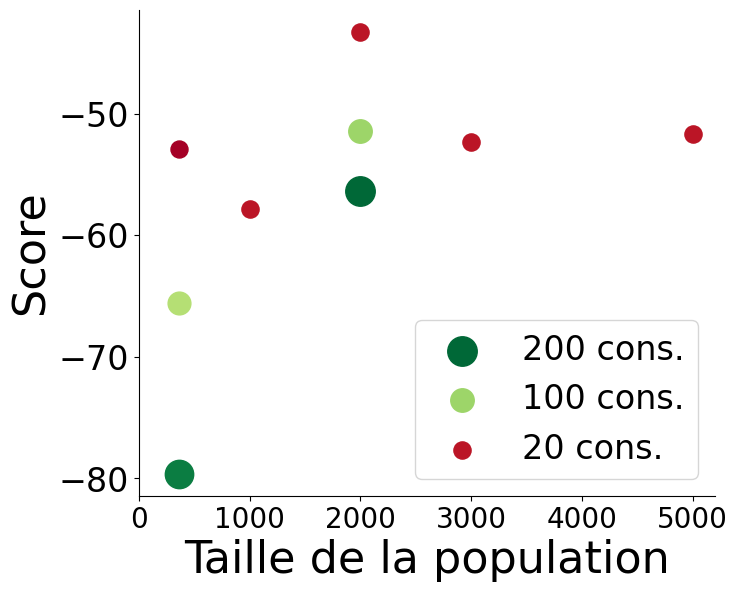

In [44]:
fig = plt.figure(figsize=(8,6))

critere_y = "vRewMax"
critere_x = "Gen"
critere_z = "vSuccess"

l_keys_used = [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 90%",
    "2000 - 95%",
    "2000 - 99%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
]


l_marker = ["o"]


axis_x_val = [360, 360, 360, 2000, 2000, 2000, 1000, 3000, 5000]
axis_y_val = [180, 90, 18, 200, 100, 20, 20, 20, 20]

all_values_y = [np.mean(np.amax(pd.concat([df[critere_y] for df in training_df[key]], axis=1), axis=0)) for key in l_keys_used]
# Calcul des couleurs en fonction de axis_y_val avec une échelle logarithmique
norm = mcolors.LogNorm(vmin=min(axis_y_val), vmax=max(axis_y_val))
colors = plt.cm.RdYlGn(norm(axis_y_val))


norm_sizes = mcolors.Normalize(vmin=min(axis_y_val), vmax=max(axis_y_val))
sizes = norm_sizes(axis_y_val)
l_legend = ["200 cons.", "100 cons.","20 cons."]
print(sizes)
for i, key in enumerate(l_keys_used):
    if i > 2 and i < 6:
        plt.scatter(axis_x_val[i], all_values_y[i], color=colors[i], 
                    zorder=i+10, marker=l_marker[0],
                    s=(sizes[i]+0.5)*300, label=l_legend[i-3])
    else:
        plt.scatter(axis_x_val[i], all_values_y[i], color=colors[i], 
                    zorder=i+10, marker=l_marker[0],
                    s=(sizes[i]+0.5)*300)
    #plt.text(axis_x_val[i]-300, axis_y_val[i]+8, f'{all_values_y[i]:.1f}', fontsize=18, ha='left', va='bottom')


classic_format()


#plt.yscale('log')
#plt.ylim(0.5, 100)
plt.xlim(0, 5200)
plt.ylabel("Score", fontsize=32)
plt.xlabel("Taille de la population", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.2, right=0.92, top=0.96, bottom=0.15)
plt.savefig('results/NbRootsSRComp.pdf', format="pdf", dpi=1000)
plt.show()

### Results for variation on the number of roots

In [45]:
critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"
l_keys_used =  [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    
    "2000 - 99% - no instr",
]


label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")


for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    print("{}($\\pm{}$) & {}($\\pm{})\\%  \\\\".format(
        np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100
        )))



-79.6($\pm17.0$) & 20.0($\pm8.0)\%  \\
-65.6($\pm10.4$) & 21.0($\pm10.0)\%  \\
-52.9($\pm28.7$) & 39.0($\pm18.0)\%  \\
-43.3($\pm23.8$) & 39.0($\pm10.0)\%  \\
-56.3($\pm13.6$) & 35.0($\pm9.0)\%  \\
-51.4($\pm25.5$) & 35.0($\pm15.0)\%  \\
-57.9($\pm37.7$) & 33.0($\pm17.0)\%  \\
-52.3($\pm6.3$) & 29.0($\pm6.0)\%  \\
-51.7($\pm39.9$) & 42.0($\pm16.0)\%  \\
-39.9($\pm12.9$) & 37.0($\pm14.0)\%  \\


### Loading the instruction information of the results

In [46]:
import re

path = "data/"

d_keys_index = {j:i for i,j in enumerate(l_keys)}
print(d_keys_index)



all_labels = []
instructionInfo = dict()

for index, key in enumerate(l_keys):
    if key=="progKC":
        continue
    l_instrInfo = []
    for i in range(5 if key!="trueSimu" else 2):
        values = [0 for _ in range(9+7)]
        with open(path+"config_" + str(d_keys_index[key]) + "_"+ str(i) +"/outLogs/out_best_stats_cleaned.md", "r") as file:
            lines = file.readlines()
            target_line = [line for line in lines if line.startswith('Use/instr')]
            valuesTemp = [[int(value[0]), int(value[1])] for value in re.findall(r'\{(\d+),(\d+)\}', target_line[0])]
            for valuetemp in valuesTemp:
                values[valuetemp[0]] = valuetemp[1]
        l_instrInfo.append(values)
        instructionInfo[key] = np.array(l_instrInfo)


{'360 - 50%': 0, '360 - 75%': 1, '360 - 95%': 2, 'All instructions - 360 - 50%': 3, 'error': 4, '2000 - 99%': 5, '2000 - 90%': 6, '2000 - 95%': 7, '1000 - 98%': 8, '3000 - 99.33%': 9, '5000 - 99.6%': 10, '2000 - 99% - All Instr': 11, '2000 - 99% - rad': 12, '2000 - 99% - 2d': 13, '2000 - 99% - 3d': 14, '2000 - 99% - rad - 3d': 15, '2000 - 99% - no instr': 16, '2000 - 99% - 2d - rad': 17, '2000 - 99% - 2d - 3d': 18, '360 - 50% - no instr': 19, '360 - 50% - all instr': 20, '360 - 50% - 2d': 21, '360 - 50% - 3d': 22, '360 - 50% - rad': 23, '360 - 50% - 2d - rad': 24, '360 - 50% - 2d - 3d': 25}


### Results for variation on the number of roots with the instructions used added

In [47]:
l_keys_used =  [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    "2000 - 99% - no instr",
]
d_val_per_key = dict()

label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

d_val_per_key = {key: [i  for i in range(9)] for key in l_keys_used}
d_val_per_key["All instructions - 360 - 50%"] = [i  for i in range(14)]

mean_data = np.zeros(9)

critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"

for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0 )
    data = np.mean(instructionInfo[key],axis=0)

    empty_data = np.zeros(9)
    for value in data:
        if d_val_per_key[key]:
            empty_data[d_val_per_key[key][0]] = value
            d_val_per_key[key].pop(0)
            
        else:
            break
    mean = np.mean(empty_data, axis=0)

    empty_data = np.round(100 * empty_data / np.sum(empty_data), 1)
    mean_data += empty_data

    print(label_used_here[key] +  "& {}($\\pm{}$) & {}($\\pm{}) & ".format(
        np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1),
        np.around(100*np.mean(max_success_of_each),),  np.around(100*np.std(max_success_of_each)),
    ) + " & ".join([str(val) for val in empty_data]) + "  \\\\")

mean_data = np.round(mean_data / len(l_keys_used),1)
print("Mean" + " & " + " & ".join([str(val) for val in mean_data]) + "  \\\\")

360 - 50\%& -79.6($\pm17.0$) & 20.0($\pm8.0) & 3.7 & 14.6 & 25.6 & 21.3 & 6.1 & 1.2 & 1.8 & 1.2 & 24.4  \\
360 - 75\%& -65.6($\pm10.4$) & 21.0($\pm10.0) & 7.9 & 22.1 & 32.1 & 7.9 & 4.2 & 2.6 & 1.6 & 3.2 & 18.4  \\
360 - 95\%& -52.9($\pm28.7$) & 39.0($\pm18.0) & 12.9 & 13.3 & 31.8 & 10.7 & 9.0 & 3.0 & 1.7 & 2.1 & 15.5  \\
2000 - 99\%& -43.3($\pm23.8$) & 39.0($\pm10.0) & 9.1 & 24.0 & 25.7 & 12.0 & 8.6 & 4.6 & 2.9 & 4.0 & 9.1  \\
2000 - 90\%& -56.3($\pm13.6$) & 35.0($\pm9.0) & 9.1 & 24.2 & 30.9 & 9.7 & 8.5 & 0.6 & 1.2 & 3.0 & 12.7  \\
2000 - 95\%& -51.4($\pm25.5$) & 35.0($\pm15.0) & 4.5 & 17.2 & 40.7 & 6.3 & 10.9 & 1.8 & 3.2 & 3.2 & 12.2  \\
1000 - 98\%& -57.9($\pm37.7$) & 33.0($\pm17.0) & 17.4 & 20.1 & 19.6 & 13.7 & 6.4 & 2.3 & 3.2 & 3.2 & 14.2  \\
3000 - 99.33\%& -52.3($\pm6.3$) & 29.0($\pm6.0) & 10.9 & 21.1 & 22.9 & 9.1 & 12.0 & 3.4 & 5.7 & 3.4 & 11.4  \\
5000 - 99.6\%& -51.7($\pm39.9$) & 42.0($\pm16.0) & 15.4 & 11.4 & 21.1 & 10.6 & 8.9 & 5.7 & 4.1 & 8.1 & 14.6  \\
2000 - 99\% - no ins

### Results for variation on the instruction set with the instructions used added

In [48]:
l_keys_used =  [
    "360 - 50% - no instr",
    "360 - 50% - 2d",
    "360 - 50% - 3d",
    "360 - 50% - rad",
    "360 - 50% - 2d - 3d",
    "360 - 50% - 2d - rad",
    "360 - 50% - all instr",
    "2000 - 99% - no instr",
    "2000 - 99% - 2d",
    "2000 - 99% - 3d",
    "2000 - 99% - rad",
    "2000 - 99% - 2d - 3d",
    "2000 - 99% - 2d - rad",
    "2000 - 99% - All Instr",
]
d_val_per_key = dict()

label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

d_val_per_key = {key: [i  for i in range(12)] for key in l_keys_used}
d_val_per_key["All instructions - 360 - 50%"] = [i  for i in range(14)]

mean_data = np.zeros(12)

critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"

for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0 )
    data = np.mean(instructionInfo[key],axis=0)

    empty_data = np.zeros(12)
    for value in data:
        if d_val_per_key[key]:
            empty_data[d_val_per_key[key][0]] = value
            d_val_per_key[key].pop(0)
            
        else:
            break
    mean = np.mean(empty_data, axis=0)

    empty_data = np.round(100 * empty_data / np.sum(empty_data), 1)
    mean_data += empty_data

    print(label_used_here[key] +  "& {}($\\pm{}$) & {}($\\pm{}$) &".format(
        np.round(np.mean(max_scores_of_each),1),  np.round(np.std(max_scores_of_each),0), np.round(100*np.mean(max_success_of_each)), np.round(100*np.std(max_success_of_each))
    ) + " & ".join([str(np.round(val)) for val in empty_data[-5:]]) + " & " + str(np.round(np.mean(empty_data[:-5]))) + " \\\\")

mean_data = np.round(mean_data / len(l_keys_used),1)
print("Mean" + " & " + " & ".join([str(val) for val in mean_data]) + "  \\\\")

360 - 50\% - no instr& -97.4($\pm29.0$) & 23.0($\pm8.0$) &0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 14.0 \\
360 - 50\% - 2d& -117.6($\pm28.0$) & 20.0($\pm11.0$) &14.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
360 - 50\% - 3d& -96.9($\pm28.0$) & 15.0($\pm5.0$) &26.0 & 0.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - rad& -97.9($\pm17.0$) & 11.0($\pm9.0$) &13.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
360 - 50\% - 2d - 3d& -112.8($\pm24.0$) & 10.0($\pm5.0$) &8.0 & 17.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - 2d - rad& -85.0($\pm14.0$) & 21.0($\pm8.0$) &9.0 & 16.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - all instr& -94.8($\pm19.0$) & 12.0($\pm8.0$) &5.0 & 10.0 & 12.0 & 1.0 & 4.0 & 10.0 \\
2000 - 99\% - no instr& -39.9($\pm13.0$) & 37.0($\pm14.0$) &0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 14.0 \\
2000 - 99\% - 2d& -40.4($\pm17.0$) & 47.0($\pm15.0$) &9.0 & 0.0 & 0.0 & 0.0 & 0.0 & 13.0 \\
2000 - 99\% - 3d& -53.2($\pm9.0$) & 30.0($\pm6.0$) &16.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
2000 - 99\% - rad& -66.4($\pm29.0$) & 30.0($\pm12.0$) 